## **Stock Price Predictor - Project**

In [16]:
import pandas as pd
import numpy as np

import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
stocks = input("Enter the code of the stock:- ")
data = yf.download(stocks, "2005-01-01", "2023-06-18", auto_adjust=True)
data.head()

Enter the code of the stock:- GC=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2005-01-03,431.000000,431.000000,431.000000,428.700012,4
2005-01-04,428.500000,428.500000,428.500000,428.500000,108
2005-01-05,425.700012,425.700012,425.700012,426.600006,2
2005-01-06,421.000000,421.000000,421.000000,421.000000,1
2005-01-07,423.700012,423.700012,418.700012,418.899994,1


In [18]:
data.shape

(4641, 5)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4641 entries, 2005-01-03 to 2023-06-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4641 non-null   float64
 1   High    4641 non-null   float64
 2   Low     4641 non-null   float64
 3   Close   4641 non-null   float64
 4   Volume  4641 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 217.5 KB


In [20]:
data.describe()

,Open,High,Low,Close,Volume
count,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000
mean,1264.359212,1270.879294,1257.452144,1264.248976,4950.084895
std,412.326156,414.626792,409.899875,412.300241,26777.329340
min,412.000000,413.600006,410.100006,412.600006,0.000000
25%,981.700012,987.700012,972.400024,978.799988,33.000000
50%,1275.599976,1280.699951,1270.800049,1274.599976,129.000000
75%,1610.800049,1617.900024,1599.500000,1610.500000,449.000000
max,2053.600098,2072.000000,2040.000000,2051.500000,386334.000000


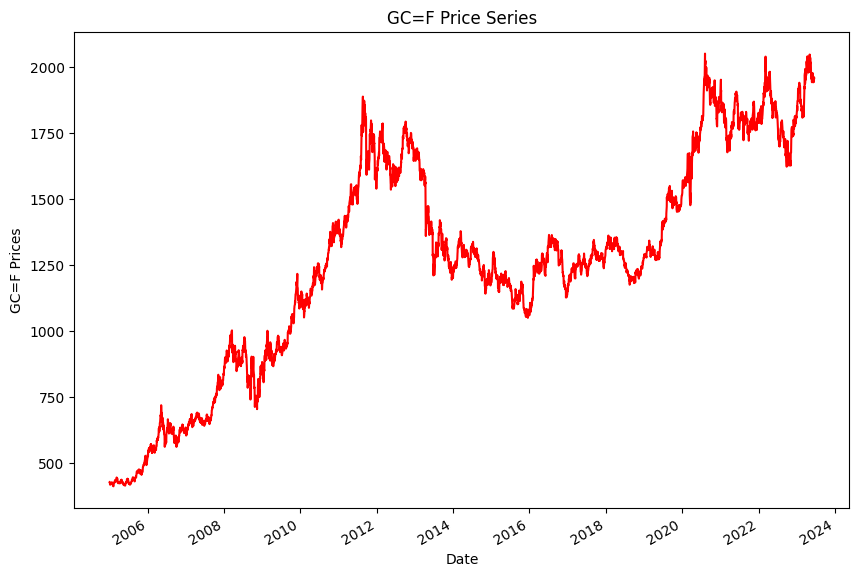

In [21]:
data.Close.plot(figsize = (10,7), color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(format(stocks)))
plt.show()

<ipython-input-23-7576e4f36f65>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

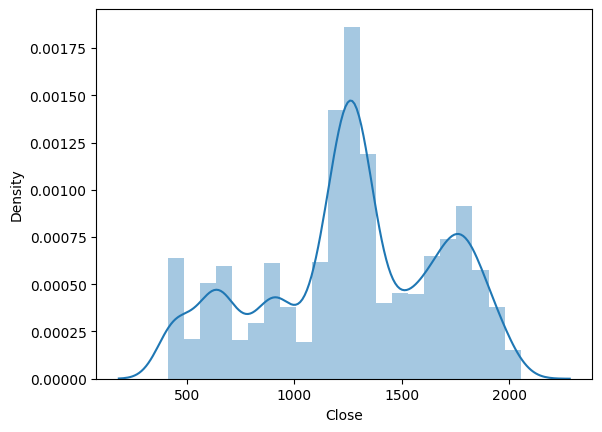

In [23]:
sns.distplot(data["Close"])

<ipython-input-24-5080fb3532bc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Low'])


<Axes: xlabel='Low', ylabel='Density'>

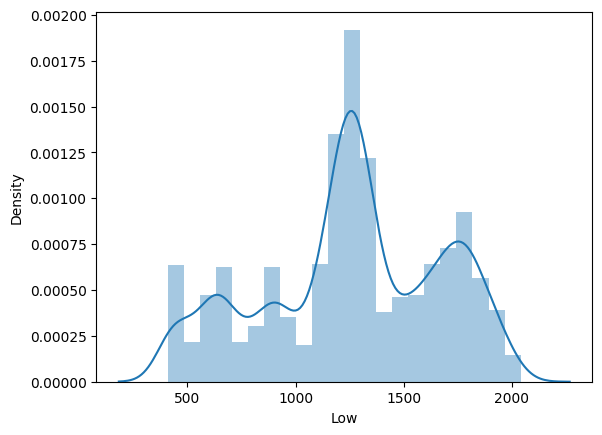

In [24]:
sns.distplot(data['Low'])

<ipython-input-25-20e345d79dca>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Open'])


<Axes: xlabel='Open', ylabel='Density'>

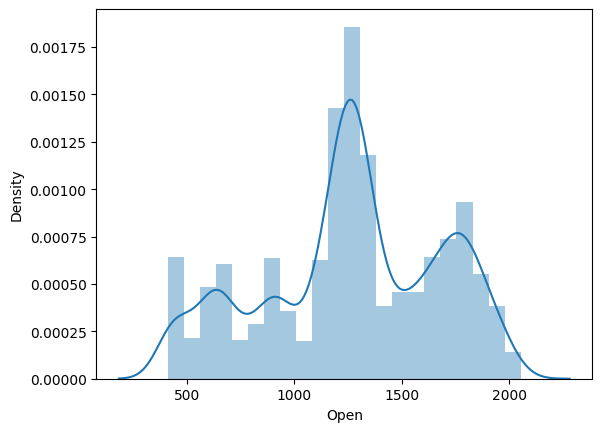

In [25]:
sns.distplot(data['Open'])

In [29]:
x = data.drop('Close', axis = 1)
y = data['Close']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3712, 4)
(929, 4)
(3712,)
(929,)


In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
pred1 = lr.predict(x_test)

In [31]:
from joblib.parallel import sqrt
from sklearn.metrics import mean_squared_error, r2_score

def calculateMetrics(y_test, y_pred):
  mse = mean_squared_error(y_test,y_pred)
  rmse = sqrt(mse)
  r_score = r2_score(y_test, y_pred)

  print("MSE - ", mse)
  print("RMSE - ", rmse)
  print("r2_score - ", r_score)

calculateMetrics(y_test, pred1)

MSE -  26.968830638910923
RMSE -  5.1931522834316075
r2_score -  0.9998415818868208
